NameError: name 'sp' is not defined

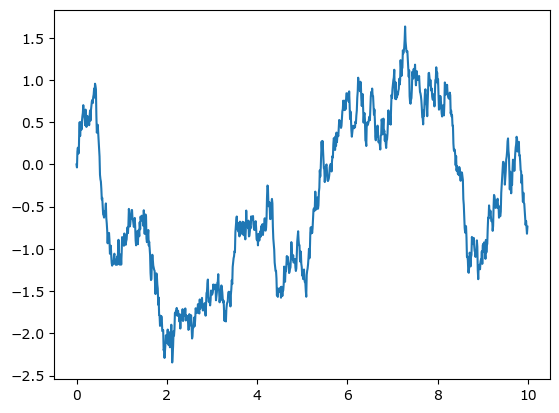

In [1]:
import numpy as np
from random import *
import matplotlib.pyplot as plt
import scipy as sp
##donnees
T=10
dt=0.01
r=0.1
sigm=0.05
h=0.01
N=int(10/dt)
P=100
normal=np.random.normal(0,1,1000)
W0=0
K=0.9
M=0
S0=1
dr=0.001
dS0=0.01
dsigm=0.001
x=1
##Mouvement brownien et Call
d1=(1/(sigm*np.sqrt(T)))*(np.log(S0/K)+((r+(sigm**2)/2)*T))
d2=d1-sigm*np.sqrt(T)
#plot mouvement brownien
t=[i*dt for i in range(N)]
S=[1 for i in range(N)]
W=[0 for i in range(N)]
for k in range(N-1):
    W[k+1]=W[k]+np.sqrt(h)*normal[k]
    
plt.plot(t,W)

#for k in range(len(S)-1):
    #S[k+1]=S[k]*(r*h+sigm*(W[k+1]-W[k]))+S[k]
#S1=np.exp(r*np.array(t)+sigm*W)
#S2=np.exp((r-(sigm**2)/2)*np.array(t)+sigm*W)



#MonteCarlo
###Calcul du prix du call par la moyenne de N trajectoires generees aleatoirement

def MonteCarlo(S0,W0,r,sigm,T):
    M=0
    W=[W0 for i in range(N)]
    for j in range(N):      
        for k in range(N-1):
            W[k+1]=W[k]+np.sqrt(h)*normal[k]
        S=[S0 for i in range(N)]
        for j in range(len(S)-1):
            S[j+1]=S[j]*(r*h+sigm*(W[j+1]-W[j]))+S[j]
        M+=np.exp(-r*T)*np.max(S[-1]-K,0)
    return M/N

#####Calcul des Grecques
###Calcul de delta
delta1=(MonteCarlo(S0+dS0,W0,r,sigm,T)-MonteCarlo(S0,W0,r,sigm,T))/dS0
delta2=sp.stats.norm.cdf(d1)
##calcul de rho
rho1=(MonteCarlo(S0,W0,r+dr,sigm,T)-MonteCarlo(S0,W0,r,sigm,T))/dr
rho2=K*T*np.exp(-T*r)*sp.stats.norm.cdf(d2)
##calcul de vega
vega1=(MonteCarlo(S0,W0,r,sigm+dsigm,T)-MonteCarlo(S0,W0,r,sigm,T))/dsigm
Vega2=np.sqrt(T)*sp.stats.norm.pdf(d1)
##calcul de theta
theta1=(MonteCarlo(S0,W0,r,sigm,T+dt)-MonteCarlo(S0,W0,r,sigm,T))/dt
theta2=-x*sigm*sp.stats.norm.pdf(d1)/(2*np.sqrt(T))-r*K*np.exp(-r*T)*sp.stats.norm.cdf(d2)
#Calcul de gamma
gamma1=((MonteCarlo(S0+dS0,W0,r,sigm,T)-2*MonteCarlo(S0,W0,r,sigm,T))+MonteCarlo(S0-dS0,W0,r,sigm,T))/(dS0)**2
gamma2=sp.stats.norm.pdf(d1)/(x*sigm*np.sqrt(T))

